In [3]:
## Import Libraries ##
import sqlite3
from sqlite3 import Error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sqlalchemy import create_engine, MetaData, Table, select, func, desc

## Connect to Database

In [4]:
engine = create_engine('sqlite:///C:/Users/604906/Desktop/BAH/Data Science/WiDS/Wildfires/188-million-us-wildfires/FPA_FOD_20170508.sqlite')

In [5]:
connection = engine.connect()

In [6]:
# Print tables names of database to make sure connection worked
print(engine.table_names())

['ElementaryGeometries', 'Fires', 'KNN', 'NWCG_UnitIDActive_20170109', 'SpatialIndex', 'geometry_columns', 'geometry_columns_auth', 'geometry_columns_field_infos', 'geometry_columns_statistics', 'geometry_columns_time', 'idx_Fires_Shape', 'idx_Fires_Shape_node', 'idx_Fires_Shape_parent', 'idx_Fires_Shape_rowid', 'spatial_ref_sys', 'spatial_ref_sys_aux', 'spatialite_history', 'sql_statements_log', 'sqlite_sequence', 'views_geometry_columns', 'views_geometry_columns_auth', 'views_geometry_columns_field_infos', 'views_geometry_columns_statistics', 'virts_geometry_columns', 'virts_geometry_columns_auth', 'virts_geometry_columns_field_infos', 'virts_geometry_columns_statistics']


## Connect to Fires Table

In [7]:
# Function in SqlAlchemy Library that reflects the table information (such as datatypes, primary keys, etc.)
metadata = MetaData()

In [8]:
# Create a Table object that can be used to query the data
Fires = Table('Fires', metadata, autoload = True, autoload_with=engine)

In [9]:
try:
    stmt = 'SELECT * FROM Fires'
    
    # Execute the statement and store all the records: results
    results = connection.execute(stmt).fetchall()

    # Create a DataFrame from the results: df
    fires = pd.DataFrame(results)

    # Set column names
    fires.columns = results[0].keys()

except Exception as err:
    print(err)

In [1]:
#Look at columns in Fires
#fires.info()

## Pull in Climate Data ##

In [10]:
climate_df = pd.read_csv('climate_df.csv')

In [13]:
climate_df.head(5) #view some data

,state,county,climate,climate_zone,moisture
0,AL,Autauga,Hot-Humid,3,A
1,AL,Baldwin,Hot-Humid,2,A
2,AL,Barbour,Hot-Humid,3,A
3,AL,Bibb,Mixed-Humid,3,A
4,AL,Blount,Mixed-Humid,3,A


In [28]:
#Fix Alaska county names that don't match / Correct county name in climate DF
climate_df['county'] = climate_df['county'].replace('Prince of Wales- Outer Ketchikan', 'Prince of Wales-Outer Ketchikan')
climate_df['county'] = climate_df['county'].replace('Skagway-Hoonah- Angoon', 'Skagway-Hoonah-Angoon')
# Correct county name in fires DF since it isn't accurate
fires['FIPS_NAME'] = fires['FIPS_NAME'].replace('Skagway-Yakutat-Angoon', 'Skagway-Hoonah-Angoon')

In [16]:
#Fix Georgie counties
# Multiple states with same county name
climate_df[climate_df['county'] == 'Bryan']['state'].value_counts()
climate_df[(climate_df['state'] == 'GA') & (climate_df['county'] == 'Bryan')]
# Add row to climate_df to match with Bryan South (GA)
climate_df = climate_df.append({'state':'GA', 'county':'Bryan South', 'climate':'Hot-Humid', 'climate_zone':'2', \
                                'moisture':'A'}, ignore_index=True)

In [17]:
# Multiple states with same county name
climate_df[climate_df['county'] == 'DeKalb']['state'].value_counts()
climate_df[(climate_df['state'] == 'GA') & (climate_df['county'] == 'DeKalb')]
climate_df[(climate_df['state'] == 'TN') & (climate_df['county'] == 'DeKalb')]
# Correct Georgia and Tennessee county names in climate DF
climate_df.loc[428]['county'] = 'Dekalb'
climate_df.loc[2446]['county'] = 'Dekalb'

In [18]:
#Fix Illinois county names
# Correct county name in fires DF since county name isn't correct (for both Illinois and Texas)
fires['FIPS_NAME'] = fires['FIPS_NAME'].replace('De Witt', 'DeWitt')
# Correct county name in fires DF since county name isn't correct
fires['FIPS_NAME'] = fires['FIPS_NAME'].replace('Cumberlin', 'Cumberland')

In [19]:
#Fix Louisiana Counties
# Correct county name in climate DF
climate_df['county'] = climate_df['county'].replace('East Carroll', 'E. Carroll')
# Correct county name in climate DF
climate_df['county'] = climate_df['county'].replace('St. LanB', 'St. Landry')

In [24]:
#Fix Montana and New Mexico Counties
# Correct county name in climate DF
climate_df['county'] = climate_df['county'].replace('Glacier', 'Glacier County')
# Correct county name in climate DF
climate_df['county'] = climate_df['county'].replace('Doña Ana', 'Dona Ana')

In [20]:
#Fix Virginia Counties
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Buena Vista')]
# Correct county name in climate DF
climate_df.loc[2836]['county'] = 'Buena Vista City'
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Chesapeake')]
# Correct county name in climate DF
climate_df.loc[2843]['county'] = 'Chesapeake City'
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Colonial Heights')]
# Correct county name in climate DF
climate_df.loc[2847]['county'] = 'Colonial Heights City'
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Hampton')]
# Correct county name in climate DF
climate_df.loc[2875]['county'] = 'Hampton City'
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Newport News')]
# Correct county name in climate DF
climate_df.loc[2904]['county'] = 'Newport News City'
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Petersburg')]
# Correct county name in climate DF
climate_df.loc[2913]['county'] = 'Petersburg City'
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Richmond City')]
# Correct county name in climate DF
climate_df['county'] = climate_df['county'].replace('Richmond City', 'Richmond (city)')
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Suffolk')]
# Correct county name in climate DF
climate_df.loc[2939]['county'] = 'Suffolk City'
climate_df[(climate_df['state'] == 'VA') & (climate_df['county'] == 'Virginia Beach')]
# Correct county name in climate DF
climate_df.loc[2943]['county'] = 'Virginia Beach City'
# Correct typo in fires DF
fires['FIPS_NAME'] = fires['FIPS_NAME'].replace('Virginia Beach city', 'Virginia Beach City')

## Check if all counties are aligned ##

In [29]:
#Checked by Tim Balton
# All non-matching counties -- all in Puerto Rico
fires[~fires['FIPS_NAME'].isin(climate_df['county'])].groupby('STATE')['FIPS_NAME'].value_counts().sort_index()

STATE  FIPS_NAME       
PR     Cabo Rojo           46
       Gurabo Municipio     1
       Lajas                8
       Vieques             21
Name: FIPS_NAME, dtype: int64

## Merge Fires and Climate DFs ##

In [30]:
# Merge on state and county
fires = \
fires.merge(climate_df, left_on=['STATE', 'FIPS_NAME'], right_on=['state', 'county'], how='left')

In [31]:
# Drop redundant columns
fires.drop(['state', 'county'], axis=1, inplace=True)
# Make all column names uppercase for consistency
fires = fires.rename(columns={'climate':'CLIMATE', 'climate_zone':'CLIMATE_ZONE', 'moisture':'MOISTURE'})

In [32]:
#Check null data
fires.isnull().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

## Feature Selection

In [72]:
df = fires[['FIRE_YEAR','DISCOVERY_DATE','DISCOVERY_DOY','STAT_CAUSE_DESCR','FIRE_SIZE','FIRE_SIZE_CLASS','STATE','FIPS_NAME',
            'LATITUDE','LONGITUDE','CLIMATE','CLIMATE_ZONE','MOISTURE']]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880465 entries, 0 to 1880464
Data columns (total 13 columns):
FIRE_YEAR           int64
DISCOVERY_DATE      float64
DISCOVERY_DOY       int64
STAT_CAUSE_DESCR    object
FIRE_SIZE           float64
FIRE_SIZE_CLASS     object
STATE               object
FIPS_NAME           object
LATITUDE            float64
LONGITUDE           float64
CLIMATE             object
CLIMATE_ZONE        object
MOISTURE            object
dtypes: float64(4), int64(2), object(7)
memory usage: 200.9+ MB


In [76]:
#check data
#print(df.head())

In [87]:
# Check distribution of Fire Sizes
#df['FIRE_SIZE'].describe()

#Normalize column
# Create x, where x the 'scores' column's values as floats
x = df[['FIRE_SIZE']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['FIRE_SIZE_norm'] = df_normalized = pd.DataFrame(x_scaled)


C:\Users\604906\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F976341048>]],
      dtype=object)

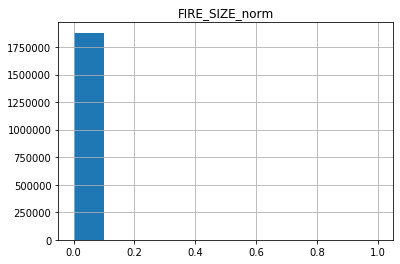

In [95]:
#Trying to normalize, but the data is still highly skewed?
df.hist(column='FIRE_SIZE_norm')

In [68]:
# Check Distribution of Fire size
# Fire Size distribution by Two States with Most Wildfires (historically): CA/GA
#sns.kdeplot(df.ix[df['STATE'] == 'CA', 'normalized_fire_size'], label = 'California', shade = True)
#sns.kdeplot(df.ix[df['STATE'] == 'GA', 'normalized_fire_size'], label = 'Georgia', shade = True)
#plt.xlabel('Fire Size'); plt.ylabel('Density'); plt.title('Density Plot of Fire Size by CA and GA');

In [96]:
#Only look at California
cali_df = df[df.STATE == 'CA'] #filter for state

In [97]:
#Check that the only state is CA
cali_df.STATE.unique()

array(['CA'], dtype=object)

In [98]:
#Data shape
cali_df.shape
#total: 1.88 million records -> now looking at 189,550.

(189550, 14)

In [186]:
#Drop the 678,148 missing records
cali_df = cali_df.dropna()
#56,220 records
cali_df

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,CLIMATE,CLIMATE_ZONE,MOISTURE,FIRE_SIZE_norm
0,2005,2453403.5,33,Miscellaneous,0.10,A,40.036944,-121.005833,Cold,5,B,1.647431e-07
1,2004,2453137.5,133,Lightning,0.25,A,38.933056,-120.404444,Hot-Dry,3,B,4.118825e-07
2,2004,2453156.5,152,Debris Burning,0.10,A,38.984167,-120.735556,Mixed-Dry,4,B,1.647431e-07
3,2004,2453184.5,180,Lightning,0.10,A,38.559167,-119.913333,Cold,6,B,1.647431e-07
4,2004,2453184.5,180,Lightning,0.10,A,38.559167,-119.933056,Cold,6,B,1.647431e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,2015,2457300.5,278,Missing/Undefined,0.01,A,38.691628,-121.372908,Hot-Dry,3,B,1.645948e-08
1872301,2015,2457316.5,294,Miscellaneous,0.10,A,38.172881,-120.801955,Mixed-Dry,4,B,1.647431e-07
1872302,2015,2457353.5,331,Miscellaneous,0.10,A,33.919157,-116.882973,Hot-Dry,3,B,1.647431e-07
1872303,2015,2457347.5,325,Debris Burning,0.25,A,37.110917,-119.322918,Hot-Dry,3,B,4.118825e-07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F973C23400>]],
      dtype=object)

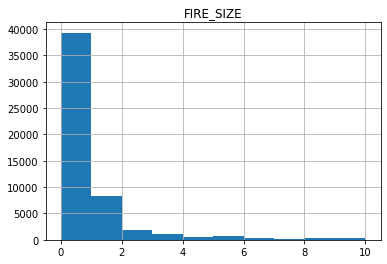

In [187]:
cali_df.hist(column='FIRE_SIZE',range=(0,10))

In [188]:
cali_df['FIRE_SIZE'].describe()
#cali_df['FIRE_SIZE_norm'].describe()

#imbalanced data
#Maybe remove outliers and look at the data again
#OR only look at the BIGGEST wildfires

count     56220.000000
mean        116.050930
std        3048.255692
min           0.010000
25%           0.100000
50%           0.110000
75%           1.000000
max      315578.800000
Name: FIRE_SIZE, dtype: float64

[(-0.5, 5)]

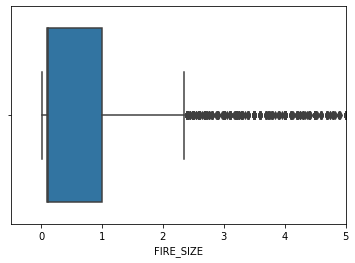

In [245]:
## Detect and Remove Outliers
ax = sns.boxplot(x=cali_df['FIRE_SIZE'])
ax.set(xlim=(-0.5, 5))

In [190]:
#largest fire_sizes
cali_df.sort_values(by='FIRE_SIZE', ascending=False).head(5)

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,CLIMATE,CLIMATE_ZONE,MOISTURE,FIRE_SIZE_norm
1572842,2012,2456151.5,225,Lightning,315578.8,G,40.615300,-120.115300,Cold,5,B,0.519946
1641750,2013,2456521.5,229,Miscellaneous,255858.0,G,37.860556,-120.083056,Mixed-Dry,4,B,0.421551
24834,2007,2454285.5,185,Equipment Use,240207.0,G,34.779167,-120.090000,Marine,3,C,0.395764
26363,2007,2454394.5,294,Miscellaneous,197990.0,G,33.074444,-116.711111,Hot-Dry,3,B,0.326207
27901,2008,2454638.5,173,Lightning,162818.0,G,36.281111,-121.658333,Marine,3,C,0.268258


In [191]:
# 1.5*IQR = (1-0.1)*1.5 = 1.35
# Q3 + 1.35 = 2.35
cali_df2 = cali_df[(cali_df.FIRE_SIZE <= 2.35)]
cali_df2
#56,220 records --> 49,194

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,CLIMATE,CLIMATE_ZONE,MOISTURE,FIRE_SIZE_norm
0,2005,2453403.5,33,Miscellaneous,0.10,A,40.036944,-121.005833,Cold,5,B,1.647431e-07
1,2004,2453137.5,133,Lightning,0.25,A,38.933056,-120.404444,Hot-Dry,3,B,4.118825e-07
2,2004,2453156.5,152,Debris Burning,0.10,A,38.984167,-120.735556,Mixed-Dry,4,B,1.647431e-07
3,2004,2453184.5,180,Lightning,0.10,A,38.559167,-119.913333,Cold,6,B,1.647431e-07
4,2004,2453184.5,180,Lightning,0.10,A,38.559167,-119.933056,Cold,6,B,1.647431e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,2015,2457300.5,278,Missing/Undefined,0.01,A,38.691628,-121.372908,Hot-Dry,3,B,1.645948e-08
1872301,2015,2457316.5,294,Miscellaneous,0.10,A,38.172881,-120.801955,Mixed-Dry,4,B,1.647431e-07
1872302,2015,2457353.5,331,Miscellaneous,0.10,A,33.919157,-116.882973,Hot-Dry,3,B,1.647431e-07
1872303,2015,2457347.5,325,Debris Burning,0.25,A,37.110917,-119.322918,Hot-Dry,3,B,4.118825e-07


## Value Counts for Categorical Columns

In [246]:
for col in cali_df.columns:
    if cali_df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(cali_df[col].value_counts())


Column Name: STAT_CAUSE_DESCR
Miscellaneous        13734
Lightning             9489
Missing/Undefined     9450
Equipment Use         7790
Arson                 4799
Debris Burning        3782
Campfire              2857
Children              1848
Smoking               1575
Powerline              711
Railroad               123
Fireworks               31
Structure               31
Name: STAT_CAUSE_DESCR, dtype: int64

Column Name: FIRE_SIZE_CLASS
A    33824
B    18782
C     2267
D      564
E      325
F      262
G      196
Name: FIRE_SIZE_CLASS, dtype: int64

Column Name: CLIMATE
Hot-Dry      32124
Cold          8778
Mixed-Dry     8642
Marine        6676
Name: CLIMATE, dtype: int64

Column Name: CLIMATE_ZONE
3    37340
4     9927
5     7768
6     1010
2      175
Name: CLIMATE_ZONE, dtype: int64

Column Name: MOISTURE
B    49544
C     6676
Name: MOISTURE, dtype: int64


## Variable Correlations ##

In [220]:
#correlations of NUMERIC variables
#cali_df.corr()['FIRE_SIZE'].sort_values()
cali_df2.corr()['FIRE_SIZE'].sort_values()

LONGITUDE        -0.064495
DISCOVERY_DOY    -0.020051
LATITUDE          0.014857
DISCOVERY_DATE    0.038241
FIRE_YEAR         0.039013
FIRE_SIZE         1.000000
FIRE_SIZE_norm    1.000000
Name: FIRE_SIZE, dtype: float64

In [124]:
#Drop Unnecessary columns first
#cali_df = cali_df.drop(columns=['FIPS_NAME','STATE'])

In [221]:
cali_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49194 entries, 0 to 1872304
Data columns (total 12 columns):
FIRE_YEAR           49194 non-null int64
DISCOVERY_DATE      49194 non-null float64
DISCOVERY_DOY       49194 non-null int64
STAT_CAUSE_DESCR    49194 non-null object
FIRE_SIZE           49194 non-null float64
FIRE_SIZE_CLASS     49194 non-null object
LATITUDE            49194 non-null float64
LONGITUDE           49194 non-null float64
CLIMATE             49194 non-null object
CLIMATE_ZONE        49194 non-null object
MOISTURE            49194 non-null object
FIRE_SIZE_norm      49194 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 4.9+ MB


In [222]:
#Categorical Correlations

# Select only categorical variables
#category_df = cali_df.select_dtypes('object')
# One hot encode the variables
#dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
#dummy_df['FIRE_SIZE'] = cali_df['FIRE_SIZE']
#dummy_df.corr()['FIRE_SIZE'].sort_values()

##Try again for cali_df2 (no outliers)
# Select only categorical variables
category_df2 = cali_df2.select_dtypes('object')
# One hot encode the variables
dummy_df2 = pd.get_dummies(category_df2)
# Put the grade back in the dataframe
dummy_df2['FIRE_SIZE'] = cali_df2['FIRE_SIZE']
dummy_df2.corr()['FIRE_SIZE'].sort_values()

FIRE_SIZE_CLASS_A                    -0.818017
STAT_CAUSE_DESCR_Lightning           -0.092606
STAT_CAUSE_DESCR_Campfire            -0.091641
CLIMATE_Cold                         -0.079392
CLIMATE_ZONE_5                       -0.066126
CLIMATE_ZONE_6                       -0.044814
MOISTURE_B                           -0.026249
STAT_CAUSE_DESCR_Smoking             -0.019669
STAT_CAUSE_DESCR_Children            -0.013704
CLIMATE_ZONE_2                       -0.008466
CLIMATE_Mixed-Dry                    -0.003802
CLIMATE_ZONE_4                       -0.000695
STAT_CAUSE_DESCR_Structure           -0.000292
STAT_CAUSE_DESCR_Fireworks            0.003206
STAT_CAUSE_DESCR_Railroad             0.003260
STAT_CAUSE_DESCR_Miscellaneous        0.012656
STAT_CAUSE_DESCR_Equipment Use        0.025360
MOISTURE_C                            0.026249
CLIMATE_Marine                        0.026249
STAT_CAUSE_DESCR_Powerline            0.029203
STAT_CAUSE_DESCR_Arson                0.035264
CLIMATE_Hot-D

In [224]:
#test_df = dummy_df[['FIRE_SIZE_CLASS_A','FIRE_SIZE_CLASS_B','STAT_CAUSE_DESCR_Equipment Use',
#                   'STAT_CAUSE_DESCR_Debris Burning','STAT_CAUSE_DESCR_Children','FIRE_SIZE']]
#test_df.head(5)

#Use the top 5 variables most correlated with fire size
test_df2 = dummy_df2[['FIRE_SIZE_CLASS_A','STAT_CAUSE_DESCR_Lightning','STAT_CAUSE_DESCR_Campfire',
                     'CLIMATE_Cold','CLIMATE_ZONE_5','FIRE_SIZE']]
test_df2.head(5)

,FIRE_SIZE_CLASS_A,STAT_CAUSE_DESCR_Lightning,STAT_CAUSE_DESCR_Campfire,CLIMATE_Cold,CLIMATE_ZONE_5,FIRE_SIZE
0,1,0,0,1,1,0.10
1,1,1,0,0,0,0.25
2,1,0,0,0,0,0.10
3,1,1,0,1,0,0.10
4,1,1,0,1,0,0.10


In [225]:
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr= LinearRegression()

# Fit linear regression.
#mlr.fit(test_df[['FIRE_SIZE_CLASS_A','FIRE_SIZE_CLASS_B','STAT_CAUSE_DESCR_Equipment Use',
#                   'STAT_CAUSE_DESCR_Debris Burning','STAT_CAUSE_DESCR_Children']], test_df['FIRE_SIZE'])
mlr.fit(test_df2[['FIRE_SIZE_CLASS_A','STAT_CAUSE_DESCR_Lightning','STAT_CAUSE_DESCR_Campfire',
                     'CLIMATE_Cold','CLIMATE_ZONE_5','FIRE_SIZE']], test_df2['FIRE_SIZE'])

# Get the slope and intercept of the line best fit.
print(mlr.intercept_)
print(mlr.coef_)

2.3092638912203256e-14
[-2.07076761e-14  4.44089210e-16  3.40005801e-15 -6.93889390e-16
 -2.77555756e-16  1.00000000e+00]


In [197]:
#Visualize
#sns.pairplot(test_df, x_vars=['FIRE_SIZE_CLASS_A','FIRE_SIZE_CLASS_B','STAT_CAUSE_DESCR_Equipment Use',
#                   'STAT_CAUSE_DESCR_Debris Burning','STAT_CAUSE_DESCR_Children'],
#            y_vars='FIRE_SIZE',kind='reg')

In [226]:
#Assign X as subset of data for features only
X = test_df2[['FIRE_SIZE_CLASS_A','STAT_CAUSE_DESCR_Lightning','STAT_CAUSE_DESCR_Campfire',
                     'CLIMATE_Cold','CLIMATE_ZONE_5','FIRE_SIZE']]
#Set y as response
y = test_df2['FIRE_SIZE']

In [227]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [228]:
#Fit model to training data
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
#feature_cols = ['FIRE_SIZE_CLASS_A','FIRE_SIZE_CLASS_B','STAT_CAUSE_DESCR_Equipment Use',
#                   'STAT_CAUSE_DESCR_Debris Burning','STAT_CAUSE_DESCR_Children']
#pair feature names and coef
#zip(feature_cols, mlr.coef_)

## Make Predictions Based on Model ##

In [230]:
y_pred = mlr.predict(X_test)

## Model Evaluation 

In [202]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #mean of absolute values of each prediction error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))#avg squared differences
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #squared root of MSE, directly interpretabel in terms of units
#First time through (without outliers)

Mean Absolute Error: 200.9362464254662
Mean Squared Error: 5840913.62207289
Root Mean Squared Error: 2416.7982170783084


In [231]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #mean of absolute values of each prediction error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))#avg squared differences
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #squared root of MSE, directly interpretabel in terms of units

#Small errors indicate good fit, but most likely due to data imbalance. 
#Since most of the fire sizes in this dataframe are from 0 < 2.35
#Are we really interesteed in this?
#Shouldn't we try to predict what features are related to unusually large wildfires (i.e. outliers)?

Mean Absolute Error: 3.4538189258314984e-15
Mean Squared Error: 4.232298407836404e-29
Root Mean Squared Error: 6.505611737443608e-15


## Random Forest on Classifying Cause of Wildfire (Try 2 with Climate Data)

In [247]:
cali_df2

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,CLIMATE,CLIMATE_ZONE,MOISTURE,FIRE_SIZE_norm
0,2005,2453403.5,33,Miscellaneous,0.10,A,40.036944,-121.005833,Cold,5,B,1.647431e-07
1,2004,2453137.5,133,Lightning,0.25,A,38.933056,-120.404444,Hot-Dry,3,B,4.118825e-07
2,2004,2453156.5,152,Debris Burning,0.10,A,38.984167,-120.735556,Mixed-Dry,4,B,1.647431e-07
3,2004,2453184.5,180,Lightning,0.10,A,38.559167,-119.913333,Cold,6,B,1.647431e-07
4,2004,2453184.5,180,Lightning,0.10,A,38.559167,-119.933056,Cold,6,B,1.647431e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,2015,2457300.5,278,Missing/Undefined,0.01,A,38.691628,-121.372908,Hot-Dry,3,B,1.645948e-08
1872301,2015,2457316.5,294,Miscellaneous,0.10,A,38.172881,-120.801955,Mixed-Dry,4,B,1.647431e-07
1872302,2015,2457353.5,331,Miscellaneous,0.10,A,33.919157,-116.882973,Hot-Dry,3,B,1.647431e-07
1872303,2015,2457347.5,325,Debris Burning,0.25,A,37.110917,-119.322918,Hot-Dry,3,B,4.118825e-07


In [248]:
#Find Min and Max Year
cali_df2.FIRE_YEAR.describe()[['min','max']]

min    1997.0
max    2015.0
Name: FIRE_YEAR, dtype: float64

In [295]:
# Drop Latitude and Longitude, which defeats the purpose of predicting location of wildfire and State (not needed here)
test1 = cali_df2.drop(columns=['LATITUDE','LONGITUDE','FIRE_SIZE_norm'])
test1.head(5)

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,CLIMATE,CLIMATE_ZONE,MOISTURE
0,2005,2453403.5,33,Miscellaneous,0.10,A,Cold,5,B
1,2004,2453137.5,133,Lightning,0.25,A,Hot-Dry,3,B
2,2004,2453156.5,152,Debris Burning,0.10,A,Mixed-Dry,4,B
3,2004,2453184.5,180,Lightning,0.10,A,Cold,6,B
4,2004,2453184.5,180,Lightning,0.10,A,Cold,6,B


In [296]:
#Categorical counts 
for col in test1.columns:
    if test1[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(test1[col].value_counts())


Column Name: STAT_CAUSE_DESCR
Miscellaneous        11861
Missing/Undefined     8288
Lightning             8235
Equipment Use         6518
Arson                 4231
Debris Burning        3434
Campfire              2691
Children              1737
Smoking               1504
Powerline              553
Railroad                98
Structure               23
Fireworks               21
Name: STAT_CAUSE_DESCR, dtype: int64

Column Name: FIRE_SIZE_CLASS
A    33824
B    15370
Name: FIRE_SIZE_CLASS, dtype: int64

Column Name: CLIMATE
Hot-Dry      28060
Cold          7811
Mixed-Dry     7542
Marine        5781
Name: CLIMATE, dtype: int64

Column Name: CLIMATE_ZONE
3    32557
4     8679
5     6894
6      917
2      147
Name: CLIMATE_ZONE, dtype: int64

Column Name: MOISTURE
B    43413
C     5781
Name: MOISTURE, dtype: int64


In [297]:
#Filter out Top 5 causes
#Misc, Missing/Undefined, Lightning, Equipment Use, Arson
test1 = test1[test1['STAT_CAUSE_DESCR'].isin(['Miscellaneous', 'Missing/Undefined','Lightning','Equipment Use','Arson'])]

In [298]:
test1['STAT_CAUSE_DESCR'].value_counts()

Miscellaneous        11861
Missing/Undefined     8288
Lightning             8235
Equipment Use         6518
Arson                 4231
Name: STAT_CAUSE_DESCR, dtype: int64

In [299]:
test1.head(5)

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,CLIMATE,CLIMATE_ZONE,MOISTURE
0,2005,2453403.5,33,Miscellaneous,0.10,A,Cold,5,B
1,2004,2453137.5,133,Lightning,0.25,A,Hot-Dry,3,B
3,2004,2453184.5,180,Lightning,0.10,A,Cold,6,B
4,2004,2453184.5,180,Lightning,0.10,A,Cold,6,B
5,2004,2453186.5,182,Lightning,0.10,A,Mixed-Dry,4,B


In [319]:
# One hot encode the variables
pd.get_dummies(test1, columns=['FIRE_SIZE_CLASS', 'CLIMATE','MOISTURE'])

#Label encode cause of wildfire
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test1['STAT_CAUSE_DESCR'] = le.fit_transform(test1['STAT_CAUSE_DESCR'])


In [320]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39133 entries, 0 to 1872304
Data columns (total 9 columns):
FIRE_YEAR           39133 non-null int64
DISCOVERY_DATE      39133 non-null float64
DISCOVERY_DOY       39133 non-null int64
STAT_CAUSE_DESCR    39133 non-null int64
FIRE_SIZE           39133 non-null float64
FIRE_SIZE_CLASS     39133 non-null object
CLIMATE             39133 non-null object
CLIMATE_ZONE        39133 non-null object
MOISTURE            39133 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 3.0+ MB


In [321]:
category_df2 = test1.select_dtypes('object')
# One hot encode the variables
data = pd.get_dummies(category_df2)
# Put the grade back in the dataframe
data['FIRE_SIZE'] = test1['FIRE_SIZE']
data['DISCOVERY_DOY'] = test1['DISCOVERY_DOY']
data['DISCOVERY_DATE'] = test1['DISCOVERY_DATE']
data['FIRE_YEAR'] = test1['FIRE_YEAR']
data['STAT_CAUSE_DESCR'] = test1['STAT_CAUSE_DESCR']

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39133 entries, 0 to 1872304
Data columns (total 18 columns):
FIRE_SIZE_CLASS_A    39133 non-null uint8
FIRE_SIZE_CLASS_B    39133 non-null uint8
CLIMATE_Cold         39133 non-null uint8
CLIMATE_Hot-Dry      39133 non-null uint8
CLIMATE_Marine       39133 non-null uint8
CLIMATE_Mixed-Dry    39133 non-null uint8
CLIMATE_ZONE_2       39133 non-null uint8
CLIMATE_ZONE_3       39133 non-null uint8
CLIMATE_ZONE_4       39133 non-null uint8
CLIMATE_ZONE_5       39133 non-null uint8
CLIMATE_ZONE_6       39133 non-null uint8
MOISTURE_B           39133 non-null uint8
MOISTURE_C           39133 non-null uint8
FIRE_SIZE            39133 non-null float64
DISCOVERY_DOY        39133 non-null int64
DISCOVERY_DATE       39133 non-null float64
FIRE_YEAR            39133 non-null int64
STAT_CAUSE_DESCR     39133 non-null int64
dtypes: float64(2), int64(3), uint8(13)
memory usage: 2.3 MB


In [323]:
#Standardize data (features have different scales/units)
from sklearn.preprocessing import StandardScaler

scaled_test1 = data.copy()
col_names = ['FIRE_YEAR', 'DISCOVERY_DATE','DISCOVERY_DOY','FIRE_SIZE'] #Don't include STAT_CAUSE_DESCR & FIPS_NAME : the dummy encoded ones
features = scaled_test1[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [324]:
#Assign results to those three columns
scaled_test1[col_names] = features
print(scaled_test1)

         FIRE_SIZE_CLASS_A  FIRE_SIZE_CLASS_B  CLIMATE_Cold  CLIMATE_Hot-Dry  \
0                        1                  0             1                0   
1                        1                  0             0                1   
3                        1                  0             1                0   
4                        1                  0             1                0   
5                        1                  0             0                0   
...                    ...                ...           ...              ...   
1872299                  1                  0             0                0   
1872300                  1                  0             0                1   
1872301                  1                  0             0                0   
1872302                  1                  0             0                1   
1872304                  1                  0             0                0   

         CLIMATE_Marine  CLIMATE_Mixed-

In [325]:
##Partitioning Data
X = scaled_test1.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = scaled_test1['STAT_CAUSE_DESCR'].values

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #30% for testing, 70% for training

In [327]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clsf = RandomForestClassifier(n_estimators=50)
rf_clsf = rf_clsf.fit(X_train, y_train)
print(rf_clsf.score(X_test,y_test))

0.4596252129471891


In [329]:
#Cause of wildfire
#scaled_test1.STAT_CAUSE_DESCR.unique() #There seems to be 13 causes for these top 10 counties.

In [330]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: STAT_CAUSE_DESCR
Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

Column Name: FIRE_SIZE_CLASS
B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64

Column Name: STATE
CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     1